--- 1. 지역별 총인구수 Top 5 ---


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010



--- 1-1. 지역별 총인구수 Plot ---


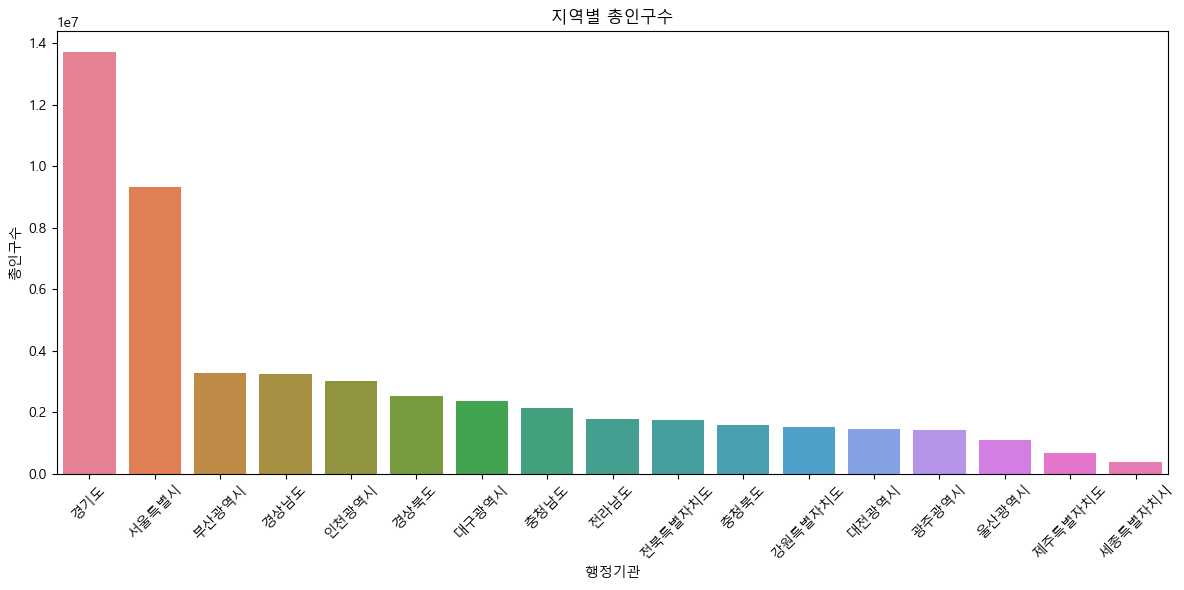


--- 2. 세대당 인구수 높은 지역 Top 5 ---


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14



--- 2-1. 지역별 세대당 인구 Plot ---


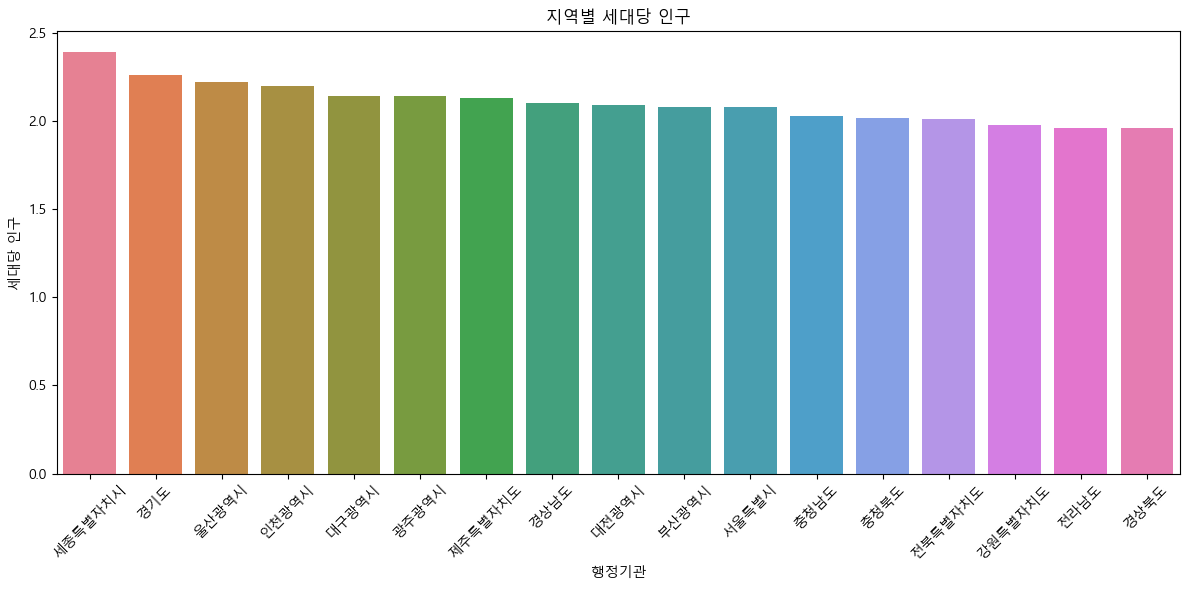


--- 3. 남녀 비율 분석 ---


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00



--- 3-1. 지역별 남녀 비율 Plot ---


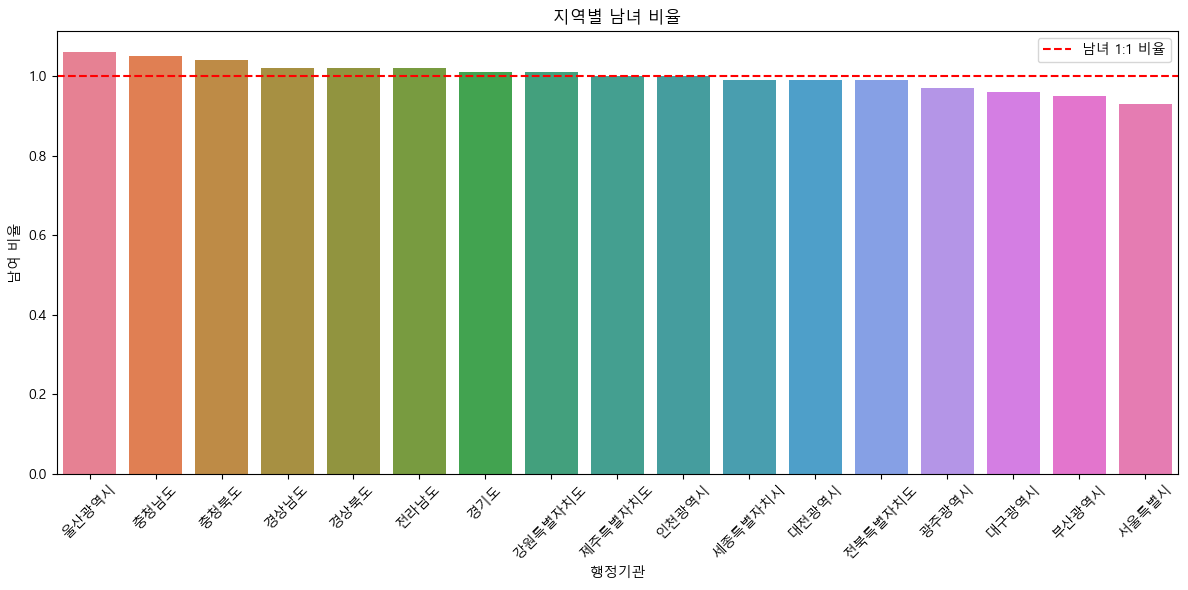


--- 4. 남자초과 / 여자초과 분석 ---


,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초



--- 5. 세대당 인구 평균보다 높은 지역 ---
전국 평균 세대당 인구수: 2.12


,행정기관,세대당 인구
0,대구광역시,2.14
1,인천광역시,2.20
2,광주광역시,2.14
3,울산광역시,2.22
4,세종특별자치시,2.39
5,경기도,2.26
6,제주특별자치도,2.13



--- 5-1. 남초 vs 여초 개수 Plot / 지역별 세대수 Plot ---


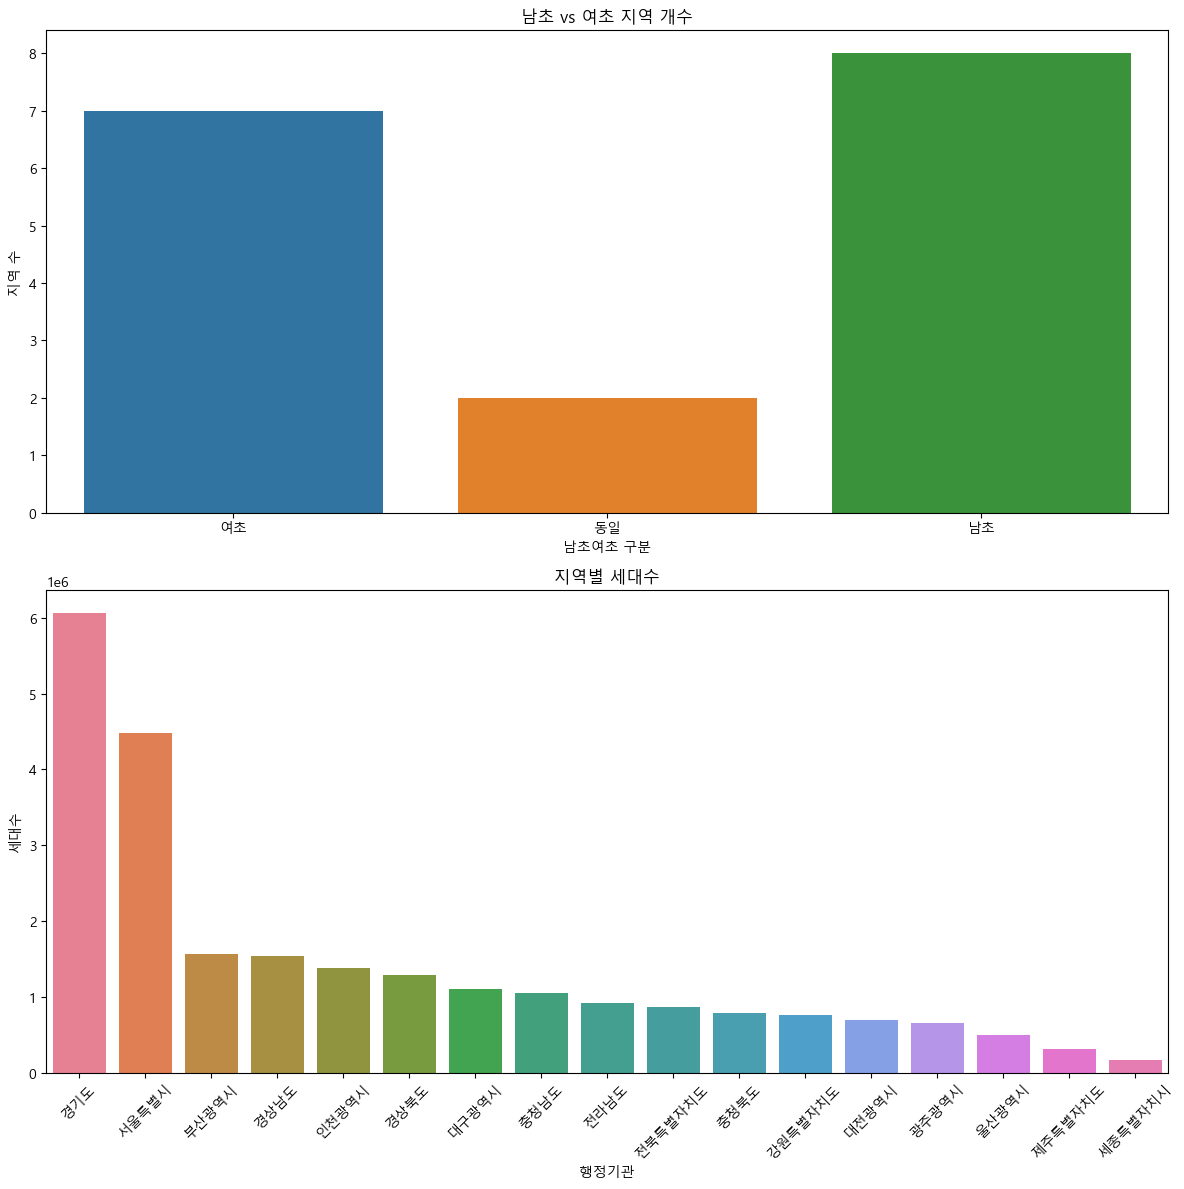


--- 6. 남자 인구 vs 여자 인구 비교 Plot ---


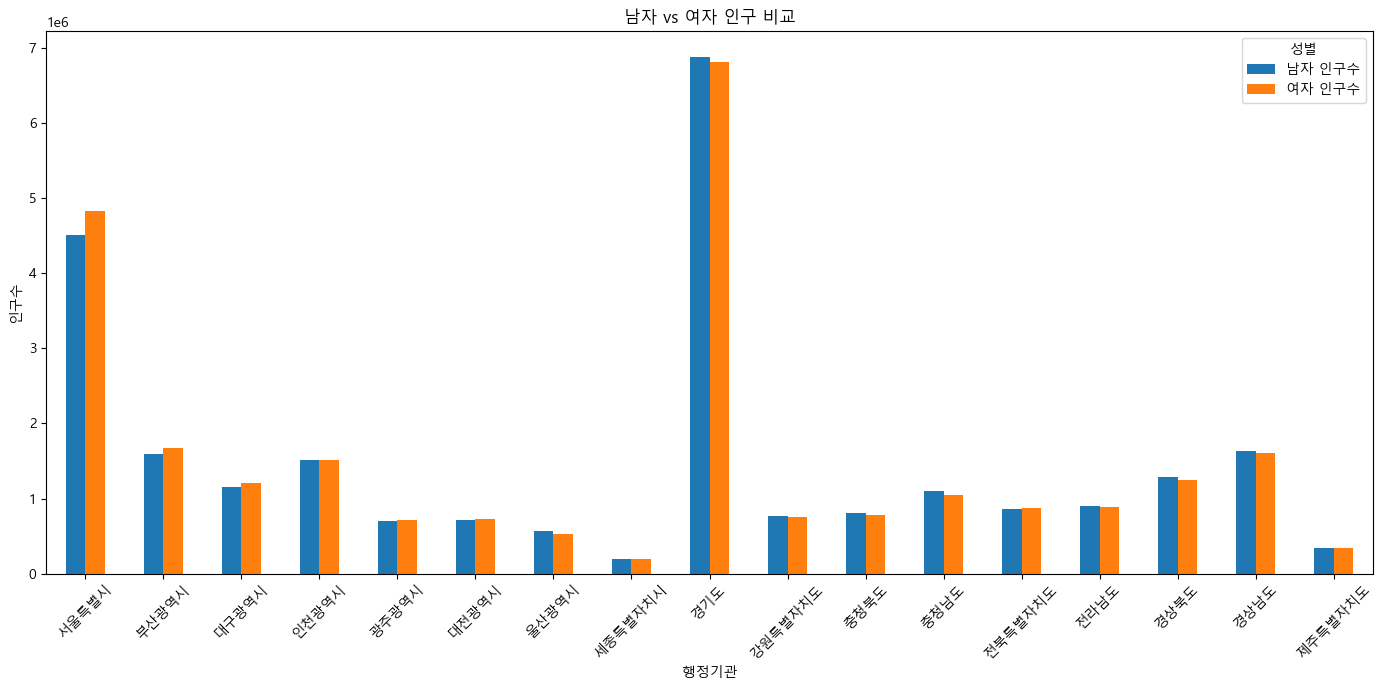

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from IPython.display import display

# 한글 폰트 설정
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_prop)
except FileNotFoundError:
    print("'맑은 고딕' 폰트를 찾을 수 없습니다. 시각화 결과에서 한글이 깨질 수 있습니다.")

# 데이터 로드 및 전처리
df_all = pd.read_csv('../data/인구현황.csv')
df = df_all[df_all['행정기관'] != '전국'].copy()


### 1. 지역별 총인구수 Top5 ###
print("--- 1. 지역별 총인구수 Top 5 ---")
top5_population = df.sort_values(by='총인구수', ascending=False).head(5)
display(top5_population[['행정기관', '총인구수']])


### 1-1. 지역별 총인구수 Plot ###
print("\n--- 1-1. 지역별 총인구수 Plot ---")
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df.sort_values(by='총인구수', ascending=False), 
    x='행정기관', 
    y='총인구수', 
    hue='행정기관'  
)

plt.title('지역별 총인구수')
plt.xlabel('행정기관')
plt.ylabel('총인구수')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()


### 2. 세대당 인구수 높은 지역 Top 5 ###
print("\n--- 2. 세대당 인구수 높은 지역 Top 5 ---")
top5_household = df.sort_values(by='세대당 인구', ascending=False).head(5)
display(top5_household[['행정기관', '세대당 인구']].reset_index(drop=True))


### 2-1. 지역별 세대당 인구 Plot ###
print("\n--- 2-1. 지역별 세대당 인구 Plot ---")
plt.figure(figsize=(12, 6))

# hue를 사용하여 자동 색상 할당
sns.barplot(
    data=df.sort_values(by='세대당 인구', ascending=False),
    x='행정기관',
    y='세대당 인구',
    hue='행정기관'
)
plt.title('지역별 세대당 인구')
plt.xlabel('행정기관')
plt.ylabel('세대당 인구')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False) # 범례 제거
plt.tight_layout()
plt.show()


### 3. 남녀 비율 분석 ###
print("\n--- 3. 남녀 비율 분석 ---")
gender_ratio = df.sort_values(by='남여 비율', ascending=False)
display(gender_ratio[['행정기관', '남여 비율']].reset_index(drop=True))


### 3-1. 지역별 남녀 비율 Plot ###
print("\n--- 3-1. 지역별 남녀 비율 Plot ---")
plt.figure(figsize=(12, 6))

# hue를 사용하여 자동 색상 할당
sns.barplot(
    data=gender_ratio,
    x='행정기관',
    y='남여 비율',
    hue='행정기관'
)
plt.axhline(y=1.0, color='red', linestyle='--', label='남녀 1:1 비율')
plt.title('지역별 남녀 비율')
plt.xlabel('행정기관')
plt.ylabel('남여 비율')
plt.xticks(rotation=45)
plt.legend() # 기준선에 대한 범례는 유지
plt.tight_layout()
plt.show()

### 4. 남자초과 / 여자초과 분석 ###
print("\n--- 4. 남자초과 / 여자초과 분석 ---")
df['남초여초'] = df['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))

# .reset_index(drop=True)를 제거하여 원래 인덱스를 유지합니다.
display(df[['행정기관', '남여 비율', '남초여초']])

### 5. 세대당 인구 평균보다 높은 지역 ###
print("\n--- 5. 세대당 인구 평균보다 높은 지역 ---")
avg_household_pop = df_all[df_all['행정기관'] == '전국']['세대당 인구'].values[0]
print(f"전국 평균 세대당 인구수: {avg_household_pop}")
above_avg_household = df[df['세대당 인구'] > avg_household_pop]
display(above_avg_household[['행정기관', '세대당 인구']].reset_index(drop=True))


### 5-1. 남초 vs 여초 개수 Plot / 지역별 세대수 Plot ###
print("\n--- 5-1. 남초 vs 여초 개수 Plot / 지역별 세대수 Plot ---")
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# 남초 vs 여초 개수 Plot
sns.countplot(
    data=df, x='남초여초', ax=ax1,
    order=['여초', '동일', '남초'], hue='남초여초'
)
ax1.set_title('남초 vs 여초 지역 개수')
ax1.set_xlabel('남초여초 구분')
ax1.set_ylabel('지역 수')

# 지역별 세대수 Plot
sns.barplot(
    data=df.sort_values('세대수', ascending=False),
    x='행정기관', y='세대수', ax=ax2,
    hue='행정기관',
    legend=False  # legend=False를 추가하여 범례를 생성하지 않도록 수정
)
ax2.set_title('지역별 세대수')
ax2.set_xlabel('행정기관')
ax2.set_ylabel('세대수')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6. 남자 인구 vs 여자 인구 비교 Plot ###
print("\n--- 6. 남자 인구 vs 여자 인구 비교 Plot ---")
df.set_index('행정기관')[['남자 인구수', '여자 인구수']].plot(kind='bar', figsize=(14, 7))
plt.title('남자 vs 여자 인구 비교')
plt.xlabel('행정기관')
plt.ylabel('인구수')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()